In [1]:
#khai báo thư viện
import pandas as pd

In [2]:
#khởi tạo data là dataFrame của file Train_select.csv
data=pd.read_csv('Train_select.csv')

In [3]:
data.head(100)#hiển thị 100 phần tử đầu của data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1137,1,1.0,0,18,0,7,1.0,196,3,...,942,1179,3616,13,5,12,1,1,1,3
96,1355,0,2.3,0,10,1,23,0.2,132,5,...,651,891,880,19,4,8,1,1,0,0
97,1665,1,0.5,0,3,1,60,0.2,194,6,...,1572,1684,1601,18,17,14,1,0,0,2
98,657,0,2.5,0,0,0,37,0.7,141,2,...,476,961,1412,14,3,18,0,1,0,0


In [4]:
data.info()#thông tin trường tính năng của data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
#khởi tạo tính năng và nhãn được tách từ bộ dữ liệu data
X=data.iloc[:,0:20]
Y=data.iloc[:,-1]

PHUONG PHAP LOC

IG:
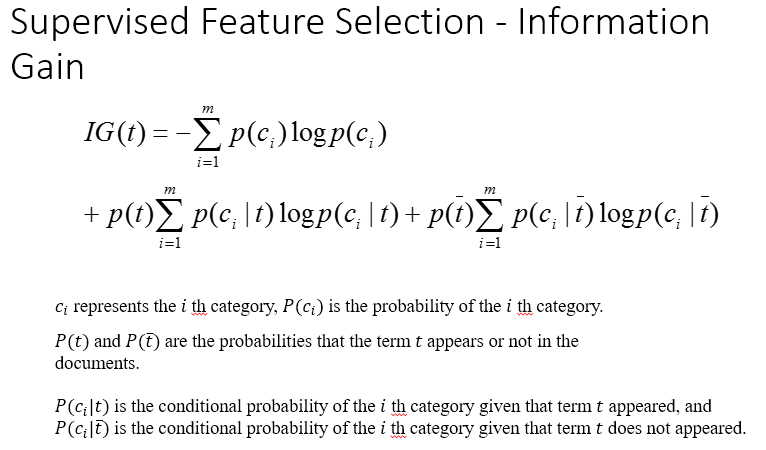

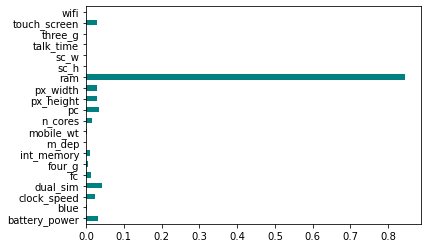

In [6]:
#khai báo các thư viện
from sklearn.feature_selection import mutual_info_classif#dùng để ước tính lượng thông tin của tính năng với nhãn
import matplotlib.pyplot as plt
%matplotlib inline
#khai báo importances là list các IG của các tính năng X với nhãn Y
importances=mutual_info_classif(X,Y)
#khởi tạo dataSeries cho importances
feat_importances=pd.Series(importances,data.columns[0:len(data.columns)-1])
#Trực quan dữ liệu importances với biểu đồ dữ liệu
feat_importances.plot(kind='barh',color='teal')
plt.show()

In [7]:
feat_importances#hiển thị dữ liệu của dataFrame feat_importances

battery_power    0.032849
blue             0.003560
clock_speed      0.024309
dual_sim         0.041808
fc               0.012492
four_g           0.005820
int_memory       0.009353
m_dep            0.000000
mobile_wt        0.001400
n_cores          0.015614
pc               0.035326
px_height        0.028295
px_width         0.028818
ram              0.844174
sc_h             0.000000
sc_w             0.000000
talk_time        0.000000
three_g          0.000000
touch_screen     0.029063
wifi             0.000000
dtype: float64

Corr:
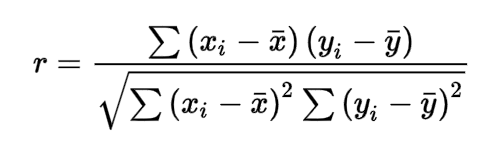

<AxesSubplot:>

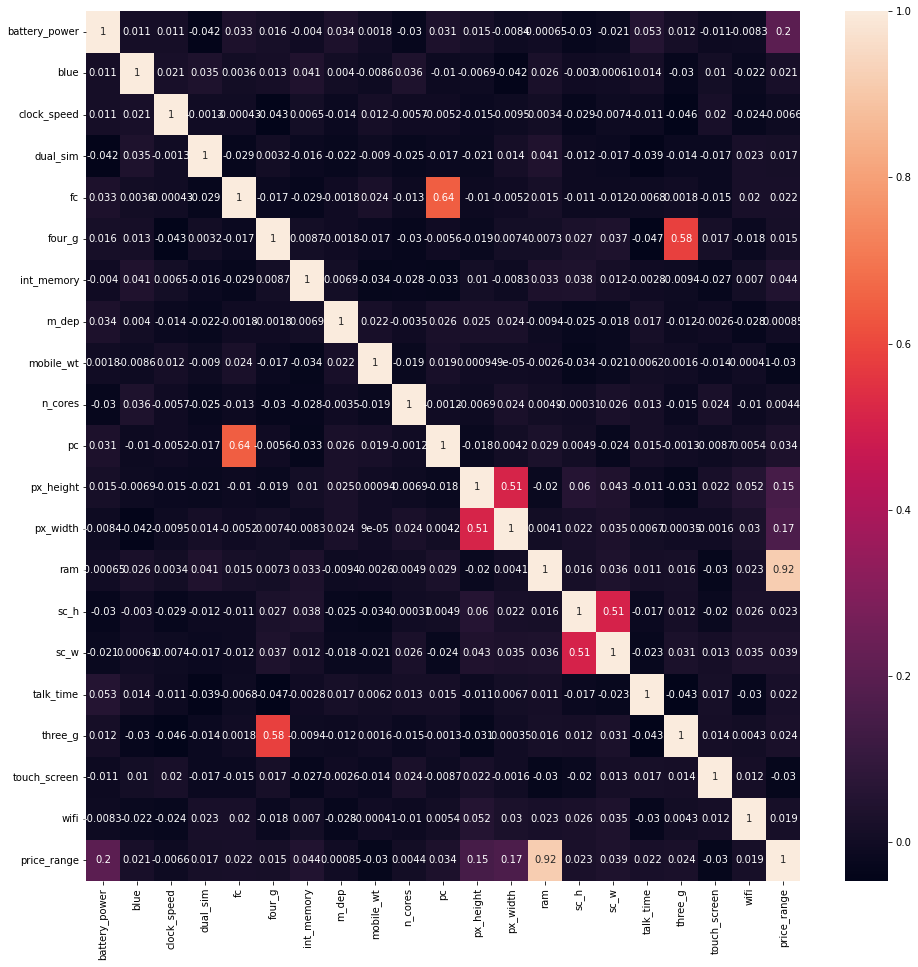

In [8]:
#khai báo thư viện
import seaborn as sns
import matplotlib.pyplot as plt
corr=data.corr()#tương quan dữ liệu data
plt.figure(figsize=(16,16))
sns.heatmap(corr,annot=True)#biểu đồ dữ liệu tương quan

In [9]:
corr.nlargest(5,'price_range')['price_range']#5 tính năng có chỉ số tương quan cao nhất với nhãn

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
Name: price_range, dtype: float64

PHUONG PHAP GOI

In [10]:
#khai báo các thư viện
from mlxtend.feature_selection import SequentialFeatureSelector#dùng như máy biến áp thực hiện lựa chọn tính năng tuần tự
from sklearn.linear_model import LogisticRegression#mô hình Logistic
#khởi tạo mô hình lr :là mô hình logistic
lr=LogisticRegression(class_weight='balanced',solver='lbfgs',random_state=42,n_jobs=-1)
#khởi tạo ffs để thêm các tính năng được chọn lọc theo Lựa chọn tính năng chuyển tiếp
ffs=SequentialFeatureSelector(lr,k_features='best',forward=True,n_jobs=-1)
#huấn luyện mô hình và xét sự cải thiện hiệu suất mô hình
ffs.fit(X,Y)
#features là list các tính năng trong ffs
features=list(ffs.k_feature_names_)
#features=list(map(int,features))
#huấn luyện mô hình
lr.fit(X[features],Y)
#tập kết quả dự đoán
y_pred=lr.predict(X[features])

In [11]:
X[features].info()#các tính năng có trong ffs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   battery_power  2000 non-null   int64
 1   px_height      2000 non-null   int64
 2   px_width       2000 non-null   int64
 3   ram            2000 non-null   int64
dtypes: int64(4)
memory usage: 62.6 KB


PHUONG PHAP NHUNG

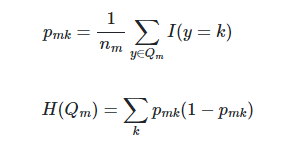

<AxesSubplot:>

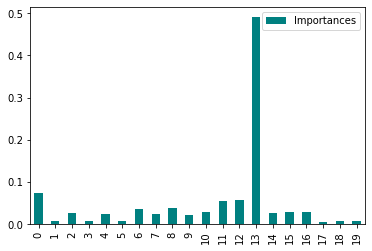

In [12]:
from sklearn.ensemble import RandomForestClassifier#mô hình phân loại rừng ngẫu nhiên
#khởi tạo mô hình 
model=RandomForestClassifier(n_estimators=340)
#huấn luyện mô hình
model.fit(X,Y)
importances=model.feature_importances_#trích trọng số gini của các tính năng và lưu vào importances
#khởi tạo dataFrame để thống kê các tính năng với trọng số gini
final_df=pd.DataFrame({"Features":pd.DataFrame(X).columns,"Importances":importances})
final_df.set_index('Importances')
final_df.sort_values('Importances')
#trực quan dữ liệu dataFrame final_df
final_df.plot.bar(color='teal')

In [13]:
final_df#hiển thị dataFrame

,Features,Importances
0,battery_power,0.074626
1,blue,0.006178
2,clock_speed,0.027322
3,dual_sim,0.006563
4,fc,0.024437
5,four_g,0.006306
6,int_memory,0.034806
7,m_dep,0.023558
8,mobile_wt,0.038725
9,n_cores,0.022477
